In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Параметры отображения графиков:
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 11})

# Считывание и предварительная обработка данных

In [4]:
# Считывание данных из файла по ссылке:
path = r'https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-04-07/tdf_winners.csv'
for i in pd.read_html(path, parse_dates=['start_date', 'born']):
    data = i

In [5]:
# Вид исходных данных:
data.head()

,Unnamed: 0,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,NaN,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,NaN,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,NaN,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,NaN,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,NaN,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [6]:
# Удаление пустого столбца:
data = data.drop('Unnamed: 0', axis='columns')

In [7]:
# Типы данных:
data.dtypes

edition                   int64
start_date       datetime64[ns]
winner_name              object
winner_team              object
distance                float64
time_overall            float64
time_margin             float64
stage_wins                int64
stages_led                int64
height                  float64
weight                  float64
age                       int64
born             datetime64[ns]
died                     object
full_name                object
nickname                 object
birth_town               object
birth_country            object
nationality              object
dtype: object

In [8]:
# Количество пропусков по параметрам:
data.isna().sum()

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height           40
weight           39
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64

In [9]:
# Преобразуем столбец с датами и пропущенными значениями в формат DateTime:
data['died'] = pd.to_datetime(data['died'].astype(str), errors='coerce')

# Визуализация данных

In [10]:
# Сводная таблица:
data.describe()

,edition,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age
count,106.000000,106.000000,98.000000,98.000000,106.000000,106.000000,66.000000,67.000000,106.000000
mean,53.500000,4212.064151,125.754983,0.267727,2.735849,10.792453,1.778788,69.253731,27.716981
std,30.743563,704.284160,41.559391,0.476194,1.842885,5.307169,0.056989,6.592795,3.354470
min,1.000000,2428.000000,82.086667,0.002222,0.000000,1.000000,1.610000,52.000000,19.000000
25%,27.250000,3657.875000,92.601597,0.050833,1.000000,6.250000,1.740000,64.500000,26.000000
50%,53.500000,4155.500000,115.026806,0.101667,2.000000,12.000000,1.770000,69.000000,28.000000
75%,79.750000,4652.500000,142.678472,0.249931,4.000000,14.000000,1.820000,74.000000,30.000000
max,106.000000,5745.000000,238.740278,2.989167,8.000000,22.000000,1.900000,88.000000,36.000000


In [11]:
# Список столбцов с числовыми данными:
num_cols = [col for col in data.columns if np.issubdtype(data.dtypes[col], np.number)]

In [12]:
# Матрица корреляции:
correlation = data[num_cols].corr()

Text(0.5, 1, 'Матрица корреляции')

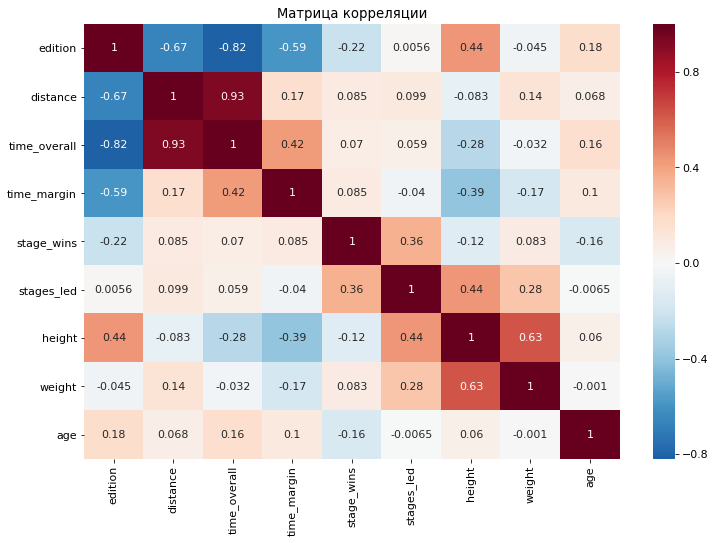

In [13]:
# Визуализация матрицы корреляции:
ax = sns.heatmap(correlation, center=0, annot=True, cmap='RdBu_r')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Матрица корреляции')

##### Выводы о зависимостях между параметрами:
- Наиболее высокая корреляция прослеживается между параметрами затраченного времени и пройденного расстояния.
- С течением времени (отраженном в параметре 'edition') постепенно снижались пройденные расстяния, затраченное время и отрыв победителя от ближайших преследователей.
- Прослеживается умеренная степень корреляции между ростом и весом участников. С течением времени рост незначительно увеличивался. При этом ни рост, ни вес, ни возраст участников не показывают значительной корреляции с другими параметрами.

Text(0.5, 0.98, 'Распределение значений параметров')

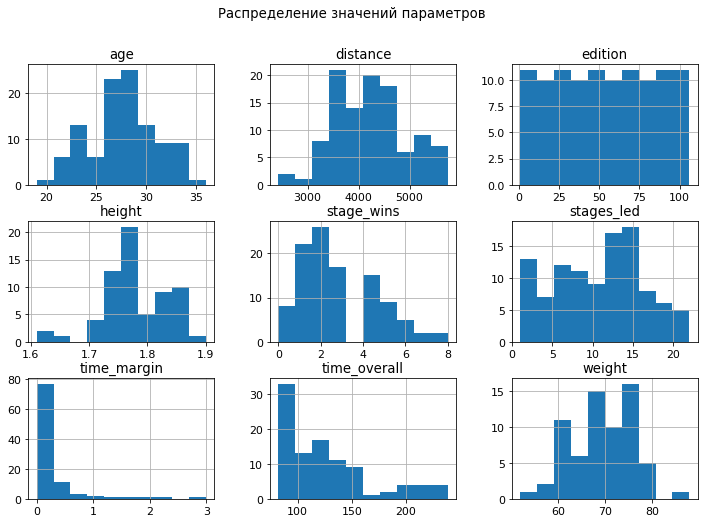

In [14]:
# Распределение числовых параметров:
data[num_cols].hist(bins=10)
plt.suptitle('Распределение значений параметров')

Text(0.5, 1.0, 'Распределение победителей по странам')

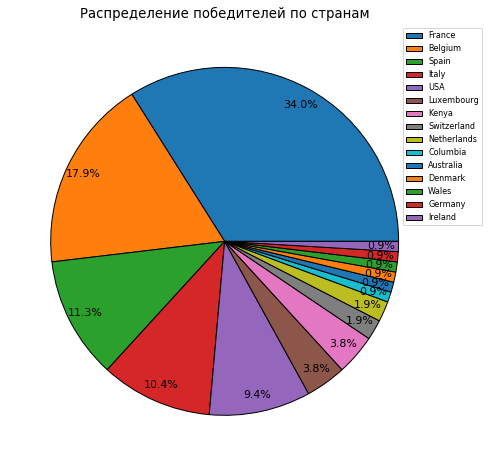

In [15]:
countries = data['birth_country'].value_counts()
slices = countries.values
labels = countries.index
plt.pie(slices, labels=labels, labeldistance=None,
        autopct='%1.1f%%', pctdistance=0.9,
        wedgeprops={'edgecolor': 'black'})
plt.legend(loc='best', bbox_to_anchor=(0.9, 0., 0.1, 1.), fontsize=8)
plt.title('Распределение победителей по странам')

Text(0.5, 1.0, 'Распределение победителей по национальностям')

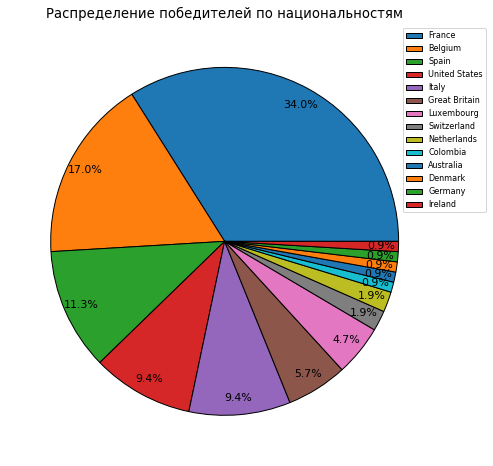

In [16]:
nationalities = data['nationality'].value_counts()
slices = nationalities.values
labels = nationalities.index
plt.pie(slices, labels=labels, labeldistance=None,
        autopct='%1.1f%%', pctdistance=0.9,
        wedgeprops={'edgecolor': 'black'})
plt.legend(loc='best', bbox_to_anchor=(0.9, 0., 0.1, 1.), fontsize=8)
plt.title('Распределение победителей по национальностям')

Text(0.5, 1.0, 'Распределение победителей по командам')

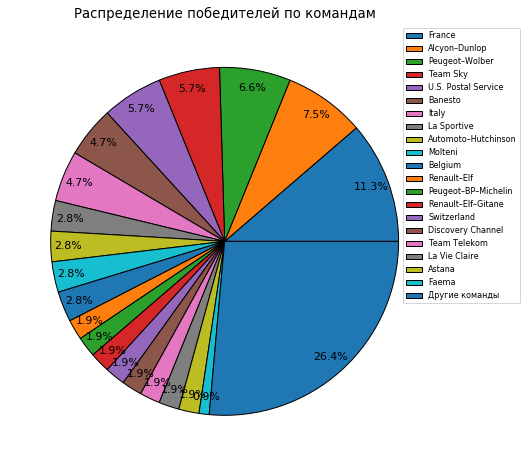

In [17]:
# ТОП-20 команд:
largect_teams = data['winner_team'].value_counts().head(20)
# Прочие команды:
others = len(data) - largect_teams.sum()

slices = largect_teams.values
labels = largect_teams.index
slices = np.append(slices, np.array([others]))
labels = np.append(labels, np.array(['Другие команды']))

plt.pie(slices, labels=labels, labeldistance=None,
        autopct='%1.1f%%', pctdistance=0.9,
        wedgeprops={'edgecolor': 'black'})
plt.legend(loc='best', bbox_to_anchor=(0.9, 0., 0.1, 1.), fontsize=8)
plt.title('Распределение победителей по командам')

### Линейная зависимость пройденной дистанции от даты проведения гонки
Данные в датасете упорядочены хронологически по времени проведения гонок.
Параметр 'edition' содержит порядковые номера от 1 до 106 и по своей сути равноценен временной шкале, но более удобен для вычисления зависимостей.

Text(0.5, 1.0, 'Пройденная дистанция')

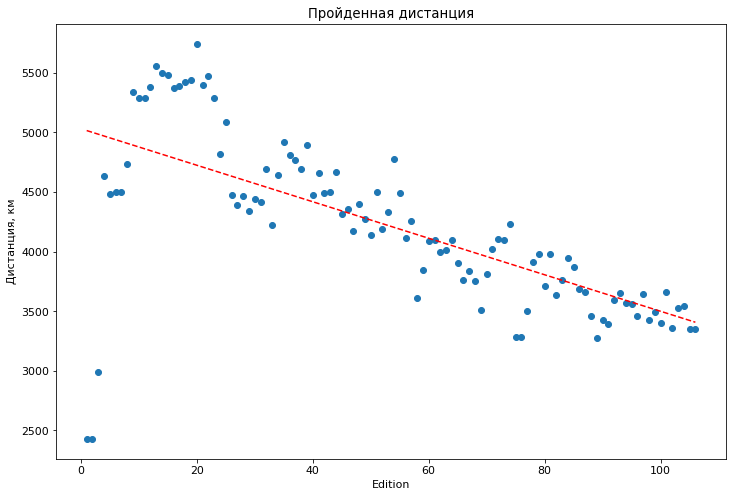

In [18]:
plt.scatter(data['edition'], data['distance'])

# Линия тренда:
trend = np.polyfit(data['edition'].values, data['distance'].values, 1)
p = np.poly1d(trend)

plt.plot(data['edition'], p(data['edition'].values), 'r--')
plt.xlabel('Edition')
plt.ylabel('Дистанция, км')
plt.title('Пройденная дистанция')

### Экспоненциальная зависимость затраченного времени от даты проведения гонки

In [19]:
# Данные по продолжительности без пропусков:
time_sequence = data[['edition', 'time_overall']].dropna()

In [20]:
# Индекс максимального значения продолжительности:
max_index = np.argmax(time_sequence['time_overall'].values)

In [21]:
# Значения параметров после этой точки:
x = time_sequence.iloc[max_index:, :]['edition']
y = time_sequence.iloc[max_index:, :]['time_overall']

In [22]:
def exp_decay(x, a, b, c):
    """Уравнение экспоненциального падения."""
    return a * np.exp(-b * x) + c

In [23]:
# Находим ограничения для поиска значений параметров:
min_a = time_sequence['time_overall'].max()
max_c = time_sequence['time_overall'].min()

In [24]:
# Подбор оптимальных параметров уравнения:
popt, pcov = curve_fit(exp_decay, x, y, bounds=([min_a, -np.inf, -np.inf], [np.inf, np.inf, max_c]))
a, b, c = popt
print(f'Fit Curve Variables: a={a}, b={b}, c={c}')

Fit Curve Variables: a=238.74027777801132, b=0.03723612007735881, c=82.08666666666664


Text(0.5, 1.0, 'Затраченное время')

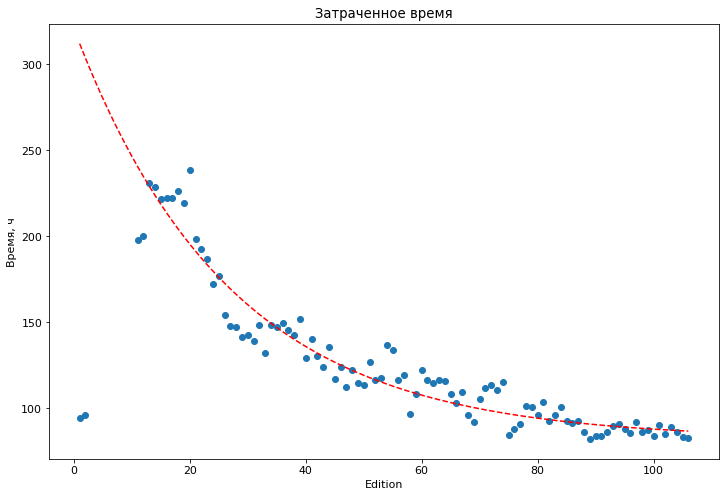

In [25]:
plt.scatter(data['edition'], data['time_overall'])
plt.plot(data['edition'], exp_decay(data['edition'], *popt), 'r--')
plt.xlabel('Edition')
plt.ylabel('Время, ч')
plt.title('Затраченное время')

### Экспоненциальная зависимость скорости участников от даты проведения гонки

In [26]:
# Вычисляем скорость участников:
data['speed'] = data['distance'] / data['time_overall']

Text(0, 0.5, 'Скорость, км/ч')

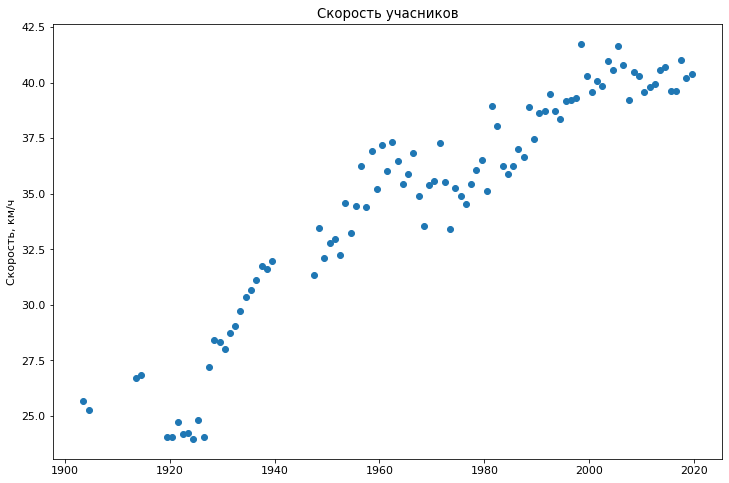

In [27]:
plt.scatter(data['start_date'], data['speed'])
plt.title('Скорость учасников')
plt.ylabel('Скорость, км/ч')

In [28]:
# Данные по скорости без пропусков:
speed_sequence = data[['edition', 'speed']].dropna()

In [29]:
# Индекс минимального значения скорости:
min_index = np.argmin(speed_sequence['speed'].values)

In [30]:
# Значения параметров после этой точки:
x = speed_sequence.iloc[min_index:, :]['edition']
y = speed_sequence.iloc[min_index:, :]['speed']

In [31]:
# Находим ограничения для поиска значений параметров:
min_c = speed_sequence['speed'].max()

In [32]:
# Подбор оптимальных параметров уравнения:
popt, pcov = curve_fit(exp_decay, x, y, bounds=([-np.inf, -np.inf, min_c], [0, np.inf, np.inf]))
a, b, c = popt
print(f'Fit Curve Variables: a={a}, b={b}, c={c}')

Fit Curve Variables: a=-25.933098613718986, b=0.027530602737965527, c=41.74322084113576


Text(0.5, 1.0, 'Скорость участников')

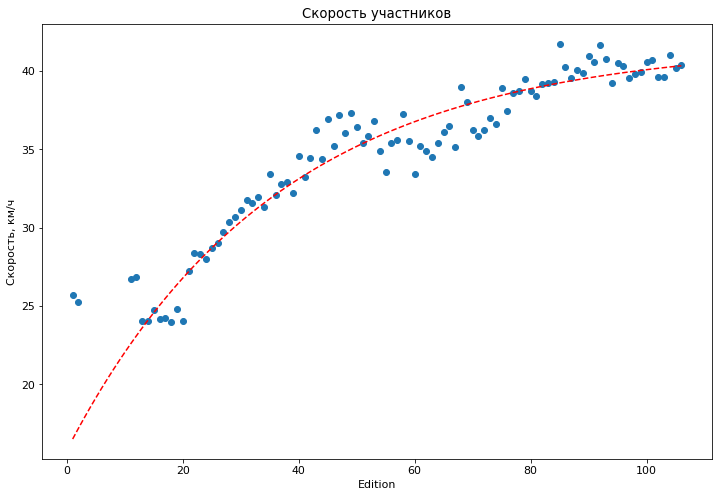

In [33]:
plt.scatter(data['edition'], data['speed'])
plt.plot(data['edition'], exp_decay(data['edition'], *popt), 'r--')
plt.xlabel('Edition')
plt.ylabel('Скорость, км/ч')
plt.title('Скорость участников')

### Анализ физических параметров

Text(0.5, 1.0, 'Увеличение роста участников')

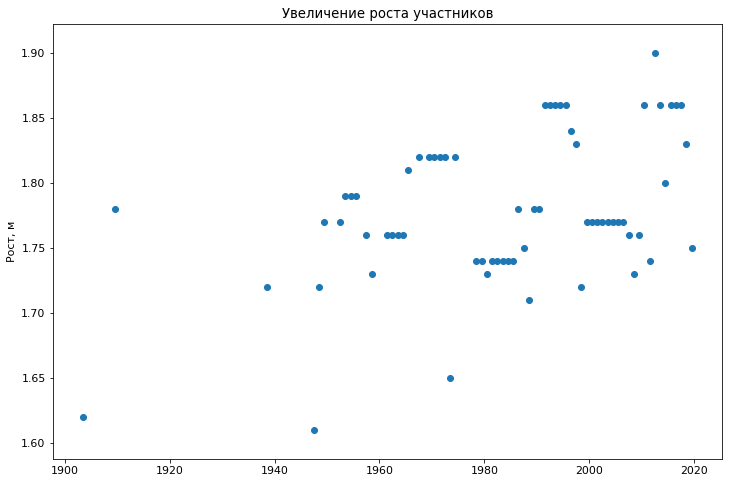

In [34]:
plt.scatter(data['start_date'], data['height'])
plt.ylabel('Рост, м')
plt.title('Увеличение роста участников')

In [35]:
# Рост и вес участников без пропусков:
phisical_pars = data[['height', 'weight']].dropna()

Text(0.5, 1.0, 'Рост и вес участников')

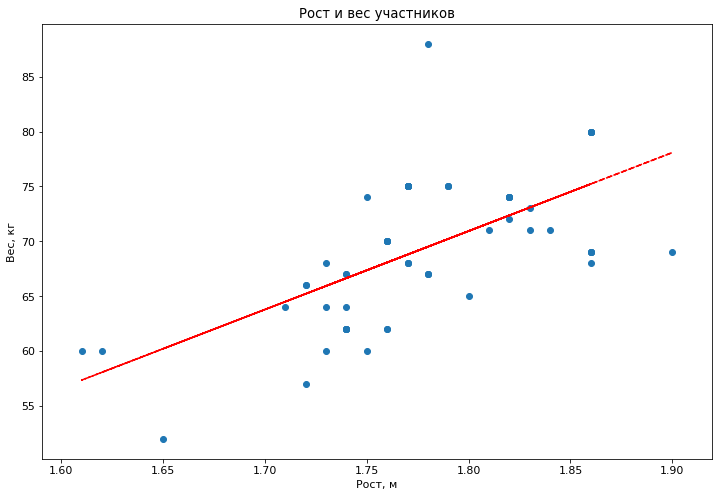

In [36]:
plt.scatter(data['height'], data['weight'])

# Линия тренда:
trend = np.polyfit(phisical_pars['height'].values, phisical_pars['weight'].values, 1)
p = np.poly1d(trend)

plt.plot(phisical_pars['height'], p(phisical_pars['height'].values), 'r--')
plt.xlabel('Рост, м')
plt.ylabel('Вес, кг')
plt.title('Рост и вес участников')

### Продолжительность жизни

Text(0.5, 1.0, 'Распределение победителей по текущему статусу')

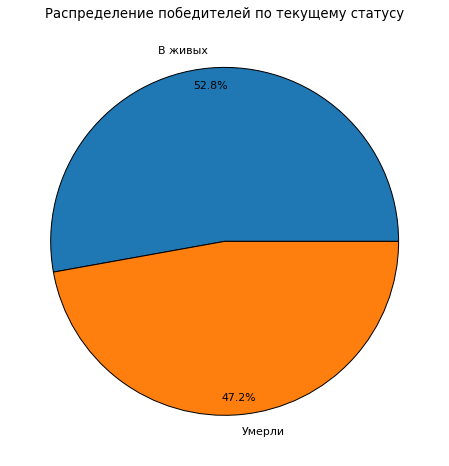

In [37]:
not_alive = data['died'].isna().sum()
alive = len(data) - not_alive

plt.pie([alive, not_alive], labels=['В живых', 'Умерли'],
        autopct='%1.1f%%', pctdistance=0.9,
        wedgeprops={'edgecolor': 'black'})
plt.title('Распределение победителей по текущему статусу')

In [38]:
# Продолжительность жизни в годах:
data['life_length'] = (data['died'] - data['born']).dt.days / 365

In [39]:
# Минимальное и максимальное значения:
min_life_span = np.round(data['life_length'].min(), 1)
max_life_span = np.round(data['life_length'].max(), 1)
print(f'Диапазон продолжительности жизни - от {min_life_span} до {max_life_span} лет.')

Диапазон продолжительности жизни - от 27.7 до 97.5 лет.


Text(0.5, 1.0, 'Продолжительность жизни')

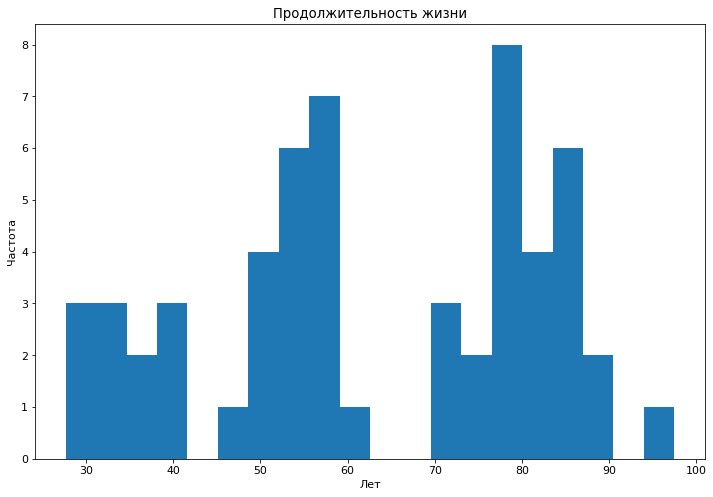

In [40]:
plt.hist(data['life_length'].dropna(), bins=20)
plt.xlabel('Лет')
plt.ylabel('Частота')
plt.title('Продолжительность жизни')

In [41]:
# Средняя продолжительность жизни по странам:
life_length = data.groupby('birth_country')['life_length'].mean().dropna()

Text(0.5, 1.0, 'Средняя продолжительность жизни')

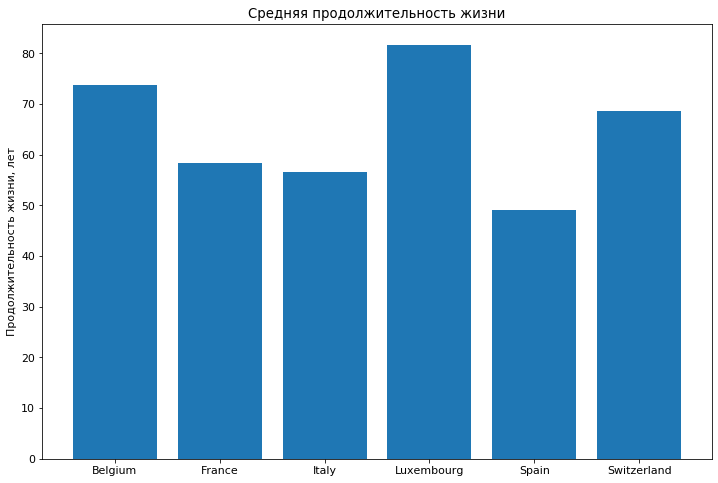

In [42]:
plt.bar(life_length.index, life_length.values)
plt.ylabel('Продолжительность жизни, лет')
plt.title('Средняя продолжительность жизни')

Text(0.5, 1.0, 'Изменение продолжительности жизни')

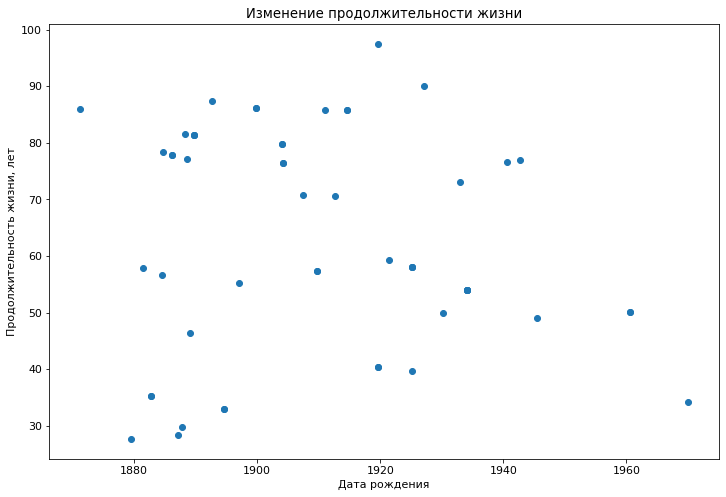

In [43]:
plt.scatter(data['born'], data['life_length'])
plt.xlabel('Дата рождения')
plt.ylabel('Продолжительность жизни, лет')
plt.title('Изменение продолжительности жизни')